# Asymptotic Behaviour
---

Description:

    This notebook performs the asymptotic analysis of the algorthm:
    
    1) as the number of particles increase
    2) as the number of nearest neighbors increase
    
---

### Import python libraries and set up the project directory

In [18]:
import json
import os, sys
from collections import defaultdict

import numpy as np
from matplotlib import pyplot as plt

# Enable LaTex in plotting.
plt.rcParams["text.usetex"] = True

PROJECT_DIR = os.path.abspath("..")
sys.path.append(PROJECT_DIR)

### Import the custom PSO code

In [19]:
from star_pso.population.swarm import Swarm
from star_pso.population.particle import Particle
from star_pso.engines.standard_pso import StandardPSO
from star_pso.utils.auxiliary import cost_function

### Load all the Benchmark problems

In [20]:
# Dimensions: 1D
from star_pso.benchmarks.equal_maxima import EqualMaxima

# Dimensions: 2D
from star_pso.benchmarks.shubert import Shubert

In [21]:
# Select one test problem.
benchmark = EqualMaxima()

### Define the cost function

Note: All the optimization problems are solved as maximizations.

In [22]:
@cost_function(minimize=False)
def func_benchmark(x_array: np.ndarray, **kwargs) -> float:
    # Return the solution.
    return benchmark.func(x_array).item()
# _end_def_

### Setup the experiment

In [23]:
# List all the possible swarm sizes.
swarm_size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Define the number of repetitions.
N_REPEATS = 30

# Maximum function evaluations.
MAX_F_EVALS = 50_000

# Stores the statistics.
stats_per_run = defaultdict(list)

# Setup the main loop.
for n_size in swarm_size:

    print(f"Running simulation with swarm size={n_size} ... \n", flush=True)

    for k in range(N_REPEATS):

        print(f"Repeatition {k} in process ... ", flush=True)

        # Get an initial (new) sample.
        x_sample = benchmark.sample_random_positions(n_pos=n_size)

        # Initial swarm population.
        swarm_t0 = Swarm([Particle(x) for x in x_sample])
    
        # Create the StandardPSO object that will carry on the optimization.
        test_PSO = StandardPSO(initial_swarm = swarm_t0, obj_func = func_benchmark,
                               x_min = benchmark.x_min, x_max = benchmark.x_max)
        # Run the experiment.
        test_PSO.run(max_it = 500, f_max_eval = MAX_F_EVALS, verbose = False,
                     options = {"w0": 0.70, "c1": 1.50, "c2": 1.50, "mode": "multimodal"})

        # Obtain the number of the global optima that were found for epsilon = 1.0e-4.
        gopt_found, gopt_total = benchmark.search_for_optima(test_PSO.swarm.best_n(n_size))

        # Update the dictionary.
        stats_per_run[n_size].append(gopt_found)
        
        # Leave a blank line between repetitions.
        print(" ")
    # _end_for__
# _end_for_

# Save the results.
with open(f"result_{benchmark.name}_01.json", 'w') as fp:
    json.dump(stats_per_run, fp)

# Display final message.
print(f"Experiment FINISHED.")

Running simulation with swarm size=10 ... 

Repeatition 0 in process ... 


11/30/2025 17:00:28 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 0.260 seconds.
 
Repeatition 1 in process ... 


11/30/2025 17:00:28 INFO: Initial f_optimal = 0.7922


Final f_optimal = 1.0000
run: elapsed time = 0.233 seconds.
 
Repeatition 2 in process ... 


11/30/2025 17:00:28 INFO: Initial f_optimal = 0.4029


Final f_optimal = 1.0000
run: elapsed time = 0.231 seconds.
 
Repeatition 3 in process ... 


11/30/2025 17:00:29 INFO: Initial f_optimal = 0.9953


Final f_optimal = 1.0000
run: elapsed time = 0.230 seconds.
 
Repeatition 4 in process ... 


11/30/2025 17:00:29 INFO: Initial f_optimal = 0.8631


Final f_optimal = 1.0000
run: elapsed time = 0.215 seconds.
 
Repeatition 5 in process ... 


11/30/2025 17:00:29 INFO: Initial f_optimal = 0.8544


Final f_optimal = 1.0000
run: elapsed time = 0.225 seconds.
 
Repeatition 6 in process ... 


11/30/2025 17:00:29 INFO: Initial f_optimal = 0.9951


Final f_optimal = 1.0000
run: elapsed time = 0.277 seconds.
 
Repeatition 7 in process ... 


11/30/2025 17:00:30 INFO: Initial f_optimal = 0.7248


Final f_optimal = 1.0000
run: elapsed time = 0.262 seconds.
 
Repeatition 8 in process ... 


11/30/2025 17:00:30 INFO: Initial f_optimal = 0.9251


Final f_optimal = 0.8176
run: elapsed time = 0.236 seconds.
 
Repeatition 9 in process ... 


11/30/2025 17:00:30 INFO: Initial f_optimal = 0.3480


Final f_optimal = 1.0000
run: elapsed time = 0.237 seconds.
 
Repeatition 10 in process ... 


11/30/2025 17:00:30 INFO: Initial f_optimal = 0.2268


Final f_optimal = 1.0000
run: elapsed time = 0.267 seconds.
 
Repeatition 11 in process ... 


11/30/2025 17:00:31 INFO: Initial f_optimal = 0.9957


Final f_optimal = 1.0000
run: elapsed time = 0.271 seconds.
 
Repeatition 12 in process ... 


11/30/2025 17:00:31 INFO: Initial f_optimal = 0.9862


Final f_optimal = 1.0000
run: elapsed time = 0.266 seconds.
 
Repeatition 13 in process ... 


11/30/2025 17:00:31 INFO: Initial f_optimal = 0.9942


Final f_optimal = 1.0000
run: elapsed time = 0.250 seconds.
 
Repeatition 14 in process ... 


11/30/2025 17:00:31 INFO: Initial f_optimal = 1.0000


Final f_optimal = 0.9312
run: elapsed time = 0.248 seconds.
 
Repeatition 15 in process ... 


11/30/2025 17:00:32 INFO: Initial f_optimal = 0.9999


Final f_optimal = 0.8499
run: elapsed time = 0.225 seconds.
 
Repeatition 16 in process ... 


11/30/2025 17:00:32 INFO: Initial f_optimal = 0.9854


Final f_optimal = 0.9910
run: elapsed time = 0.292 seconds.
 
Repeatition 17 in process ... 


11/30/2025 17:00:32 INFO: Initial f_optimal = 0.9345


Final f_optimal = 1.0000
run: elapsed time = 0.270 seconds.
 
Repeatition 18 in process ... 


11/30/2025 17:00:32 INFO: Initial f_optimal = 0.9944


Final f_optimal = 1.0000
run: elapsed time = 0.261 seconds.
 
Repeatition 19 in process ... 


11/30/2025 17:00:33 INFO: Initial f_optimal = 0.9994


Final f_optimal = 0.9966
run: elapsed time = 0.263 seconds.
 
Repeatition 20 in process ... 


11/30/2025 17:00:33 INFO: Initial f_optimal = 0.9958


Final f_optimal = 0.7164
run: elapsed time = 0.246 seconds.
 
Repeatition 21 in process ... 


11/30/2025 17:00:33 INFO: Initial f_optimal = 0.9994


Final f_optimal = 1.0000
run: elapsed time = 0.244 seconds.
 
Repeatition 22 in process ... 


11/30/2025 17:00:33 INFO: Initial f_optimal = 0.9985


Final f_optimal = 1.0000
run: elapsed time = 0.247 seconds.
 
Repeatition 23 in process ... 


11/30/2025 17:00:34 INFO: Initial f_optimal = 0.6966


Final f_optimal = 0.9973
run: elapsed time = 0.241 seconds.
 
Repeatition 24 in process ... 


11/30/2025 17:00:34 INFO: Initial f_optimal = 0.9930


Final f_optimal = 1.0000
run: elapsed time = 0.263 seconds.
 
Repeatition 25 in process ... 


11/30/2025 17:00:34 INFO: Initial f_optimal = 0.9775


Final f_optimal = 0.8967
run: elapsed time = 0.285 seconds.
 
Repeatition 26 in process ... 


11/30/2025 17:00:34 INFO: Initial f_optimal = 0.8564


Final f_optimal = 1.0000
run: elapsed time = 0.201 seconds.
 
Repeatition 27 in process ... 


11/30/2025 17:00:35 INFO: Initial f_optimal = 0.9934


Final f_optimal = 0.8745
run: elapsed time = 0.237 seconds.
 
Repeatition 28 in process ... 


11/30/2025 17:00:35 INFO: Initial f_optimal = 0.9702


Final f_optimal = 1.0000
run: elapsed time = 0.214 seconds.
 
Repeatition 29 in process ... 


11/30/2025 17:00:35 INFO: Initial f_optimal = 0.7563


Final f_optimal = 1.0000
run: elapsed time = 0.216 seconds.
 
Running simulation with swarm size=20 ... 

Repeatition 0 in process ... 


11/30/2025 17:00:35 INFO: Initial f_optimal = 0.9974


Final f_optimal = 1.0000
run: elapsed time = 0.347 seconds.
 
Repeatition 1 in process ... 


11/30/2025 17:00:36 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 0.356 seconds.
 
Repeatition 2 in process ... 


11/30/2025 17:00:36 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 0.357 seconds.
 
Repeatition 3 in process ... 


11/30/2025 17:00:36 INFO: Initial f_optimal = 0.9869


Final f_optimal = 1.0000
run: elapsed time = 0.340 seconds.
 
Repeatition 4 in process ... 


11/30/2025 17:00:37 INFO: Initial f_optimal = 0.9786


Final f_optimal = 1.0000
run: elapsed time = 0.341 seconds.
 
Repeatition 5 in process ... 


11/30/2025 17:00:37 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 0.341 seconds.
 
Repeatition 6 in process ... 


11/30/2025 17:00:37 INFO: Initial f_optimal = 0.9918


Final f_optimal = 1.0000
run: elapsed time = 0.343 seconds.
 
Repeatition 7 in process ... 


11/30/2025 17:00:38 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 0.347 seconds.
 
Repeatition 8 in process ... 


11/30/2025 17:00:38 INFO: Initial f_optimal = 0.9997


Final f_optimal = 1.0000
run: elapsed time = 0.340 seconds.
 
Repeatition 9 in process ... 


11/30/2025 17:00:38 INFO: Initial f_optimal = 0.9903


Final f_optimal = 1.0000
run: elapsed time = 0.335 seconds.
 
Repeatition 10 in process ... 


11/30/2025 17:00:39 INFO: Initial f_optimal = 0.9825


Final f_optimal = 1.0000
run: elapsed time = 0.336 seconds.
 
Repeatition 11 in process ... 


11/30/2025 17:00:39 INFO: Initial f_optimal = 0.9848


Final f_optimal = 1.0000
run: elapsed time = 0.330 seconds.
 
Repeatition 12 in process ... 


11/30/2025 17:00:39 INFO: Initial f_optimal = 0.9996


Final f_optimal = 1.0000
run: elapsed time = 0.342 seconds.
 
Repeatition 13 in process ... 


11/30/2025 17:00:40 INFO: Initial f_optimal = 0.9973


Final f_optimal = 0.9999
run: elapsed time = 0.337 seconds.
 
Repeatition 14 in process ... 


11/30/2025 17:00:40 INFO: Initial f_optimal = 0.9961


Final f_optimal = 1.0000
run: elapsed time = 0.337 seconds.
 
Repeatition 15 in process ... 


11/30/2025 17:00:40 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 0.338 seconds.
 
Repeatition 16 in process ... 


11/30/2025 17:00:41 INFO: Initial f_optimal = 0.9952


Final f_optimal = 1.0000
run: elapsed time = 0.336 seconds.
 
Repeatition 17 in process ... 


11/30/2025 17:00:41 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 0.344 seconds.
 
Repeatition 18 in process ... 


11/30/2025 17:00:42 INFO: Initial f_optimal = 0.9928


Final f_optimal = 1.0000
run: elapsed time = 0.343 seconds.
 
Repeatition 19 in process ... 


11/30/2025 17:00:42 INFO: Initial f_optimal = 0.9468


Final f_optimal = 1.0000
run: elapsed time = 0.338 seconds.
 
Repeatition 20 in process ... 


11/30/2025 17:00:42 INFO: Initial f_optimal = 0.9993


Final f_optimal = 1.0000
run: elapsed time = 0.332 seconds.
 
Repeatition 21 in process ... 


11/30/2025 17:00:43 INFO: Initial f_optimal = 0.9802


Final f_optimal = 1.0000
run: elapsed time = 0.353 seconds.
 
Repeatition 22 in process ... 


11/30/2025 17:00:43 INFO: Initial f_optimal = 0.9738


Final f_optimal = 1.0000
run: elapsed time = 0.332 seconds.
 
Repeatition 23 in process ... 


11/30/2025 17:00:43 INFO: Initial f_optimal = 0.9522


Final f_optimal = 1.0000
run: elapsed time = 0.360 seconds.
 
Repeatition 24 in process ... 


11/30/2025 17:00:44 INFO: Initial f_optimal = 0.9194


Final f_optimal = 1.0000
run: elapsed time = 0.339 seconds.
 
Repeatition 25 in process ... 


11/30/2025 17:00:44 INFO: Initial f_optimal = 0.9953


Final f_optimal = 1.0000
run: elapsed time = 0.336 seconds.
 
Repeatition 26 in process ... 


11/30/2025 17:00:44 INFO: Initial f_optimal = 0.8288


Final f_optimal = 1.0000
run: elapsed time = 0.335 seconds.
 
Repeatition 27 in process ... 


11/30/2025 17:00:45 INFO: Initial f_optimal = 0.9995


Final f_optimal = 1.0000
run: elapsed time = 0.344 seconds.
 
Repeatition 28 in process ... 


11/30/2025 17:00:45 INFO: Initial f_optimal = 0.7172


Final f_optimal = 1.0000
run: elapsed time = 0.330 seconds.
 
Repeatition 29 in process ... 


11/30/2025 17:00:45 INFO: Initial f_optimal = 0.9603


Final f_optimal = 1.0000
run: elapsed time = 0.333 seconds.
 
Running simulation with swarm size=30 ... 

Repeatition 0 in process ... 


11/30/2025 17:00:46 INFO: Initial f_optimal = 0.9992


Final f_optimal = 1.0000
run: elapsed time = 0.490 seconds.
 
Repeatition 1 in process ... 


11/30/2025 17:00:46 INFO: Initial f_optimal = 0.9949


Final f_optimal = 1.0000
run: elapsed time = 0.493 seconds.
 
Repeatition 2 in process ... 


11/30/2025 17:00:47 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 0.573 seconds.
 
Repeatition 3 in process ... 


11/30/2025 17:00:47 INFO: Initial f_optimal = 0.9978


Final f_optimal = 1.0000
run: elapsed time = 0.621 seconds.
 
Repeatition 4 in process ... 


11/30/2025 17:00:48 INFO: Initial f_optimal = 0.9978


Final f_optimal = 1.0000
run: elapsed time = 0.607 seconds.
 
Repeatition 5 in process ... 


11/30/2025 17:00:48 INFO: Initial f_optimal = 0.9960


Final f_optimal = 1.0000
run: elapsed time = 0.508 seconds.
 
Repeatition 6 in process ... 


11/30/2025 17:00:49 INFO: Initial f_optimal = 0.9968


Final f_optimal = 1.0000
run: elapsed time = 0.500 seconds.
 
Repeatition 7 in process ... 


11/30/2025 17:00:49 INFO: Initial f_optimal = 0.9616


Final f_optimal = 1.0000
run: elapsed time = 0.560 seconds.
 
Repeatition 8 in process ... 


11/30/2025 17:00:50 INFO: Initial f_optimal = 0.9935


Final f_optimal = 1.0000
run: elapsed time = 0.479 seconds.
 
Repeatition 9 in process ... 


11/30/2025 17:00:50 INFO: Initial f_optimal = 0.9645


Final f_optimal = 1.0000
run: elapsed time = 0.475 seconds.
 
Repeatition 10 in process ... 


11/30/2025 17:00:51 INFO: Initial f_optimal = 0.9924


Final f_optimal = 1.0000
run: elapsed time = 0.533 seconds.
 
Repeatition 11 in process ... 


11/30/2025 17:00:51 INFO: Initial f_optimal = 0.9984


Final f_optimal = 1.0000
run: elapsed time = 0.478 seconds.
 
Repeatition 12 in process ... 


11/30/2025 17:00:52 INFO: Initial f_optimal = 0.9996


Final f_optimal = 1.0000
run: elapsed time = 0.554 seconds.
 
Repeatition 13 in process ... 


11/30/2025 17:00:53 INFO: Initial f_optimal = 0.9966


Final f_optimal = 1.0000
run: elapsed time = 0.574 seconds.
 
Repeatition 14 in process ... 


11/30/2025 17:00:53 INFO: Initial f_optimal = 0.9986


Final f_optimal = 1.0000
run: elapsed time = 0.542 seconds.
 
Repeatition 15 in process ... 


11/30/2025 17:00:54 INFO: Initial f_optimal = 0.9982


Final f_optimal = 1.0000
run: elapsed time = 0.509 seconds.
 
Repeatition 16 in process ... 


11/30/2025 17:00:54 INFO: Initial f_optimal = 0.9896


Final f_optimal = 1.0000
run: elapsed time = 0.538 seconds.
 
Repeatition 17 in process ... 


11/30/2025 17:00:55 INFO: Initial f_optimal = 0.9983


Final f_optimal = 1.0000
run: elapsed time = 0.668 seconds.
 
Repeatition 18 in process ... 


11/30/2025 17:00:55 INFO: Initial f_optimal = 0.9980


Final f_optimal = 1.0000
run: elapsed time = 0.639 seconds.
 
Repeatition 19 in process ... 


11/30/2025 17:00:56 INFO: Initial f_optimal = 0.9924


Final f_optimal = 1.0000
run: elapsed time = 0.545 seconds.
 
Repeatition 20 in process ... 


11/30/2025 17:00:57 INFO: Initial f_optimal = 0.9977


Final f_optimal = 1.0000
run: elapsed time = 0.550 seconds.
 
Repeatition 21 in process ... 


11/30/2025 17:00:57 INFO: Initial f_optimal = 0.9997


Final f_optimal = 1.0000
run: elapsed time = 0.616 seconds.
 
Repeatition 22 in process ... 


11/30/2025 17:00:58 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 0.711 seconds.
 
Repeatition 23 in process ... 


11/30/2025 17:00:58 INFO: Initial f_optimal = 0.9982


Final f_optimal = 1.0000
run: elapsed time = 0.618 seconds.
 
Repeatition 24 in process ... 


11/30/2025 17:00:59 INFO: Initial f_optimal = 0.9957


Final f_optimal = 1.0000
run: elapsed time = 0.619 seconds.
 
Repeatition 25 in process ... 


11/30/2025 17:01:00 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 0.656 seconds.
 
Repeatition 26 in process ... 


11/30/2025 17:01:00 INFO: Initial f_optimal = 0.9957


Final f_optimal = 1.0000
run: elapsed time = 0.640 seconds.
 
Repeatition 27 in process ... 


11/30/2025 17:01:01 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 0.539 seconds.
 
Repeatition 28 in process ... 


11/30/2025 17:01:01 INFO: Initial f_optimal = 0.9836


Final f_optimal = 1.0000
run: elapsed time = 0.552 seconds.
 
Repeatition 29 in process ... 


11/30/2025 17:01:02 INFO: Initial f_optimal = 0.9968


Final f_optimal = 1.0000
run: elapsed time = 0.518 seconds.
 
Running simulation with swarm size=40 ... 

Repeatition 0 in process ... 


11/30/2025 17:01:03 INFO: Initial f_optimal = 0.9979


Final f_optimal = 1.0000
run: elapsed time = 0.686 seconds.
 
Repeatition 1 in process ... 


11/30/2025 17:01:03 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 0.655 seconds.
 
Repeatition 2 in process ... 


11/30/2025 17:01:04 INFO: Initial f_optimal = 0.9975


Final f_optimal = 1.0000
run: elapsed time = 0.634 seconds.
 
Repeatition 3 in process ... 


11/30/2025 17:01:05 INFO: Initial f_optimal = 0.9955


Final f_optimal = 1.0000
run: elapsed time = 0.636 seconds.
 
Repeatition 4 in process ... 


11/30/2025 17:01:05 INFO: Initial f_optimal = 0.9919


Final f_optimal = 1.0000
run: elapsed time = 0.629 seconds.
 
Repeatition 5 in process ... 


11/30/2025 17:01:06 INFO: Initial f_optimal = 0.9987


Final f_optimal = 1.0000
run: elapsed time = 0.640 seconds.
 
Repeatition 6 in process ... 


11/30/2025 17:01:06 INFO: Initial f_optimal = 0.9952


Final f_optimal = 1.0000
run: elapsed time = 0.727 seconds.
 
Repeatition 7 in process ... 


11/30/2025 17:01:07 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 0.688 seconds.
 
Repeatition 8 in process ... 


11/30/2025 17:01:08 INFO: Initial f_optimal = 0.9974


Final f_optimal = 1.0000
run: elapsed time = 0.685 seconds.
 
Repeatition 9 in process ... 


11/30/2025 17:01:09 INFO: Initial f_optimal = 0.9988


Final f_optimal = 1.0000
run: elapsed time = 0.662 seconds.
 
Repeatition 10 in process ... 


11/30/2025 17:01:09 INFO: Initial f_optimal = 0.9799


Final f_optimal = 1.0000
run: elapsed time = 0.719 seconds.
 
Repeatition 11 in process ... 


11/30/2025 17:01:10 INFO: Initial f_optimal = 0.9927


Final f_optimal = 1.0000
run: elapsed time = 0.629 seconds.
 
Repeatition 12 in process ... 


11/30/2025 17:01:11 INFO: Initial f_optimal = 0.9930


Final f_optimal = 1.0000
run: elapsed time = 0.625 seconds.
 
Repeatition 13 in process ... 


11/30/2025 17:01:11 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 0.621 seconds.
 
Repeatition 14 in process ... 


11/30/2025 17:01:12 INFO: Initial f_optimal = 0.9947


Final f_optimal = 1.0000
run: elapsed time = 0.731 seconds.
 
Repeatition 15 in process ... 


11/30/2025 17:01:13 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 0.661 seconds.
 
Repeatition 16 in process ... 


11/30/2025 17:01:13 INFO: Initial f_optimal = 0.9940


Final f_optimal = 1.0000
run: elapsed time = 0.711 seconds.
 
Repeatition 17 in process ... 


11/30/2025 17:01:14 INFO: Initial f_optimal = 0.9956


Final f_optimal = 1.0000
run: elapsed time = 0.769 seconds.
 
Repeatition 18 in process ... 


11/30/2025 17:01:15 INFO: Initial f_optimal = 0.9994


Final f_optimal = 1.0000
run: elapsed time = 0.725 seconds.
 
Repeatition 19 in process ... 


11/30/2025 17:01:15 INFO: Initial f_optimal = 0.9997


Final f_optimal = 1.0000
run: elapsed time = 0.815 seconds.
 
Repeatition 20 in process ... 


11/30/2025 17:01:16 INFO: Initial f_optimal = 0.9984


Final f_optimal = 1.0000
run: elapsed time = 0.753 seconds.
 
Repeatition 21 in process ... 


11/30/2025 17:01:17 INFO: Initial f_optimal = 0.9981


Final f_optimal = 1.0000
run: elapsed time = 0.698 seconds.
 
Repeatition 22 in process ... 


11/30/2025 17:01:18 INFO: Initial f_optimal = 0.9557


Final f_optimal = 1.0000
run: elapsed time = 0.640 seconds.
 
Repeatition 23 in process ... 


11/30/2025 17:01:18 INFO: Initial f_optimal = 0.9962


Final f_optimal = 1.0000
run: elapsed time = 0.680 seconds.
 
Repeatition 24 in process ... 


11/30/2025 17:01:19 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 0.772 seconds.
 
Repeatition 25 in process ... 


11/30/2025 17:01:20 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 0.628 seconds.
 
Repeatition 26 in process ... 


11/30/2025 17:01:20 INFO: Initial f_optimal = 0.9960


Final f_optimal = 1.0000
run: elapsed time = 0.630 seconds.
 
Repeatition 27 in process ... 


11/30/2025 17:01:21 INFO: Initial f_optimal = 0.9398


Final f_optimal = 1.0000
run: elapsed time = 0.634 seconds.
 
Repeatition 28 in process ... 


11/30/2025 17:01:22 INFO: Initial f_optimal = 0.9975


Final f_optimal = 1.0000
run: elapsed time = 0.727 seconds.
 
Repeatition 29 in process ... 


11/30/2025 17:01:22 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 0.654 seconds.
 
Running simulation with swarm size=50 ... 

Repeatition 0 in process ... 


11/30/2025 17:01:23 INFO: Initial f_optimal = 0.9989


Final f_optimal = 1.0000
run: elapsed time = 1.036 seconds.
 
Repeatition 1 in process ... 


11/30/2025 17:01:24 INFO: Initial f_optimal = 0.9991


Final f_optimal = 1.0000
run: elapsed time = 1.012 seconds.
 
Repeatition 2 in process ... 


11/30/2025 17:01:25 INFO: Initial f_optimal = 0.9765


Final f_optimal = 1.0000
run: elapsed time = 1.107 seconds.
 
Repeatition 3 in process ... 


11/30/2025 17:01:26 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 1.200 seconds.
 
Repeatition 4 in process ... 


11/30/2025 17:01:27 INFO: Initial f_optimal = 0.9920


Final f_optimal = 1.0000
run: elapsed time = 1.133 seconds.
 
Repeatition 5 in process ... 


11/30/2025 17:01:29 INFO: Initial f_optimal = 0.9910


Final f_optimal = 1.0000
run: elapsed time = 1.158 seconds.
 
Repeatition 6 in process ... 


11/30/2025 17:01:30 INFO: Initial f_optimal = 0.9864


Final f_optimal = 1.0000
run: elapsed time = 1.070 seconds.
 
Repeatition 7 in process ... 


11/30/2025 17:01:31 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 1.057 seconds.
 
Repeatition 8 in process ... 


11/30/2025 17:01:32 INFO: Initial f_optimal = 0.9997


Final f_optimal = 1.0000
run: elapsed time = 1.068 seconds.
 
Repeatition 9 in process ... 


11/30/2025 17:01:33 INFO: Initial f_optimal = 0.9997


Final f_optimal = 1.0000
run: elapsed time = 0.970 seconds.
 
Repeatition 10 in process ... 


11/30/2025 17:01:34 INFO: Initial f_optimal = 0.9631


Final f_optimal = 1.0000
run: elapsed time = 0.994 seconds.
 
Repeatition 11 in process ... 


11/30/2025 17:01:35 INFO: Initial f_optimal = 0.9991


Final f_optimal = 1.0000
run: elapsed time = 0.962 seconds.
 
Repeatition 12 in process ... 


11/30/2025 17:01:36 INFO: Initial f_optimal = 0.9935


Final f_optimal = 1.0000
run: elapsed time = 0.993 seconds.
 
Repeatition 13 in process ... 


11/30/2025 17:01:37 INFO: Initial f_optimal = 0.9994


Final f_optimal = 1.0000
run: elapsed time = 1.016 seconds.
 
Repeatition 14 in process ... 


11/30/2025 17:01:38 INFO: Initial f_optimal = 0.9988


Final f_optimal = 1.0000
run: elapsed time = 1.142 seconds.
 
Repeatition 15 in process ... 


11/30/2025 17:01:39 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.037 seconds.
 
Repeatition 16 in process ... 


11/30/2025 17:01:40 INFO: Initial f_optimal = 0.9995


Final f_optimal = 1.0000
run: elapsed time = 0.971 seconds.
 
Repeatition 17 in process ... 


11/30/2025 17:01:41 INFO: Initial f_optimal = 0.9947


Final f_optimal = 1.0000
run: elapsed time = 1.048 seconds.
 
Repeatition 18 in process ... 


11/30/2025 17:01:42 INFO: Initial f_optimal = 0.9252


Final f_optimal = 1.0000
run: elapsed time = 0.990 seconds.
 
Repeatition 19 in process ... 


11/30/2025 17:01:43 INFO: Initial f_optimal = 0.9779


Final f_optimal = 1.0000
run: elapsed time = 1.012 seconds.
 
Repeatition 20 in process ... 


11/30/2025 17:01:44 INFO: Initial f_optimal = 0.9995


Final f_optimal = 1.0000
run: elapsed time = 1.011 seconds.
 
Repeatition 21 in process ... 


11/30/2025 17:01:45 INFO: Initial f_optimal = 0.9986


Final f_optimal = 1.0000
run: elapsed time = 0.986 seconds.
 
Repeatition 22 in process ... 


11/30/2025 17:01:46 INFO: Initial f_optimal = 0.9809


Final f_optimal = 1.0000
run: elapsed time = 1.043 seconds.
 
Repeatition 23 in process ... 


11/30/2025 17:01:47 INFO: Initial f_optimal = 0.9968


Final f_optimal = 1.0000
run: elapsed time = 1.088 seconds.
 
Repeatition 24 in process ... 


11/30/2025 17:01:48 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 0.983 seconds.
 
Repeatition 25 in process ... 


11/30/2025 17:01:49 INFO: Initial f_optimal = 0.9784


Final f_optimal = 1.0000
run: elapsed time = 0.903 seconds.
 
Repeatition 26 in process ... 


11/30/2025 17:01:50 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 0.896 seconds.
 
Repeatition 27 in process ... 


11/30/2025 17:01:51 INFO: Initial f_optimal = 0.9993


Final f_optimal = 1.0000
run: elapsed time = 0.892 seconds.
 
Repeatition 28 in process ... 


11/30/2025 17:01:52 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 0.878 seconds.
 
Repeatition 29 in process ... 


11/30/2025 17:01:53 INFO: Initial f_optimal = 0.9993


Final f_optimal = 1.0000
run: elapsed time = 0.866 seconds.
 
Running simulation with swarm size=60 ... 

Repeatition 0 in process ... 


11/30/2025 17:01:54 INFO: Initial f_optimal = 0.9940


Final f_optimal = 1.0000
run: elapsed time = 1.029 seconds.
 
Repeatition 1 in process ... 


11/30/2025 17:01:55 INFO: Initial f_optimal = 0.9997


Final f_optimal = 1.0000
run: elapsed time = 1.009 seconds.
 
Repeatition 2 in process ... 


11/30/2025 17:01:56 INFO: Initial f_optimal = 0.9932


Final f_optimal = 1.0000
run: elapsed time = 1.200 seconds.
 
Repeatition 3 in process ... 


11/30/2025 17:01:57 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 1.302 seconds.
 
Repeatition 4 in process ... 


11/30/2025 17:01:58 INFO: Initial f_optimal = 0.9971


Final f_optimal = 1.0000
run: elapsed time = 1.037 seconds.
 
Repeatition 5 in process ... 


11/30/2025 17:01:59 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.017 seconds.
 
Repeatition 6 in process ... 


11/30/2025 17:02:00 INFO: Initial f_optimal = 0.9955


Final f_optimal = 1.0000
run: elapsed time = 0.923 seconds.
 
Repeatition 7 in process ... 


11/30/2025 17:02:01 INFO: Initial f_optimal = 0.9965


Final f_optimal = 1.0000
run: elapsed time = 0.965 seconds.
 
Repeatition 8 in process ... 


11/30/2025 17:02:02 INFO: Initial f_optimal = 0.9992


Final f_optimal = 1.0000
run: elapsed time = 1.002 seconds.
 
Repeatition 9 in process ... 


11/30/2025 17:02:03 INFO: Initial f_optimal = 0.9957


Final f_optimal = 1.0000
run: elapsed time = 1.012 seconds.
 
Repeatition 10 in process ... 


11/30/2025 17:02:04 INFO: Initial f_optimal = 0.9990


Final f_optimal = 1.0000
run: elapsed time = 0.983 seconds.
 
Repeatition 11 in process ... 


11/30/2025 17:02:05 INFO: Initial f_optimal = 0.9993


Final f_optimal = 1.0000
run: elapsed time = 0.995 seconds.
 
Repeatition 12 in process ... 


11/30/2025 17:02:06 INFO: Initial f_optimal = 0.9997


Final f_optimal = 1.0000
run: elapsed time = 1.132 seconds.
 
Repeatition 13 in process ... 


11/30/2025 17:02:07 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.195 seconds.
 
Repeatition 14 in process ... 


11/30/2025 17:02:09 INFO: Initial f_optimal = 0.9988


Final f_optimal = 1.0000
run: elapsed time = 1.297 seconds.
 
Repeatition 15 in process ... 


11/30/2025 17:02:10 INFO: Initial f_optimal = 0.9997


Final f_optimal = 1.0000
run: elapsed time = 1.029 seconds.
 
Repeatition 16 in process ... 


11/30/2025 17:02:11 INFO: Initial f_optimal = 0.9969


Final f_optimal = 1.0000
run: elapsed time = 0.971 seconds.
 
Repeatition 17 in process ... 


11/30/2025 17:02:12 INFO: Initial f_optimal = 0.9995


Final f_optimal = 1.0000
run: elapsed time = 1.035 seconds.
 
Repeatition 18 in process ... 


11/30/2025 17:02:13 INFO: Initial f_optimal = 0.9929


Final f_optimal = 1.0000
run: elapsed time = 1.017 seconds.
 
Repeatition 19 in process ... 


11/30/2025 17:02:14 INFO: Initial f_optimal = 0.9948


Final f_optimal = 1.0000
run: elapsed time = 1.052 seconds.
 
Repeatition 20 in process ... 


11/30/2025 17:02:15 INFO: Initial f_optimal = 0.9994


Final f_optimal = 1.0000
run: elapsed time = 0.978 seconds.
 
Repeatition 21 in process ... 


11/30/2025 17:02:16 INFO: Initial f_optimal = 0.9996


Final f_optimal = 1.0000
run: elapsed time = 0.955 seconds.
 
Repeatition 22 in process ... 


11/30/2025 17:02:17 INFO: Initial f_optimal = 0.9863


Final f_optimal = 1.0000
run: elapsed time = 0.945 seconds.
 
Repeatition 23 in process ... 


11/30/2025 17:02:18 INFO: Initial f_optimal = 0.9970


Final f_optimal = 1.0000
run: elapsed time = 0.947 seconds.
 
Repeatition 24 in process ... 


11/30/2025 17:02:19 INFO: Initial f_optimal = 0.9831


Final f_optimal = 1.0000
run: elapsed time = 1.000 seconds.
 
Repeatition 25 in process ... 


11/30/2025 17:02:20 INFO: Initial f_optimal = 0.9958


Final f_optimal = 1.0000
run: elapsed time = 0.958 seconds.
 
Repeatition 26 in process ... 


11/30/2025 17:02:21 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 0.976 seconds.
 
Repeatition 27 in process ... 


11/30/2025 17:02:22 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.043 seconds.
 
Repeatition 28 in process ... 


11/30/2025 17:02:23 INFO: Initial f_optimal = 0.9996


Final f_optimal = 1.0000
run: elapsed time = 1.067 seconds.
 
Repeatition 29 in process ... 


11/30/2025 17:02:24 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 0.996 seconds.
 
Running simulation with swarm size=70 ... 

Repeatition 0 in process ... 


11/30/2025 17:02:25 INFO: Initial f_optimal = 0.9959


Final f_optimal = 1.0000
run: elapsed time = 1.185 seconds.
 
Repeatition 1 in process ... 


11/30/2025 17:02:26 INFO: Initial f_optimal = 0.9059


Final f_optimal = 1.0000
run: elapsed time = 1.200 seconds.
 
Repeatition 2 in process ... 


11/30/2025 17:02:27 INFO: Initial f_optimal = 0.9733


Final f_optimal = 1.0000
run: elapsed time = 1.149 seconds.
 
Repeatition 3 in process ... 


11/30/2025 17:02:28 INFO: Initial f_optimal = 0.9802


Final f_optimal = 1.0000
run: elapsed time = 1.195 seconds.
 
Repeatition 4 in process ... 


11/30/2025 17:02:30 INFO: Initial f_optimal = 0.9996


Final f_optimal = 1.0000
run: elapsed time = 1.194 seconds.
 
Repeatition 5 in process ... 


11/30/2025 17:02:31 INFO: Initial f_optimal = 0.9979


Final f_optimal = 1.0000
run: elapsed time = 1.234 seconds.
 
Repeatition 6 in process ... 


11/30/2025 17:02:32 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 1.189 seconds.
 
Repeatition 7 in process ... 


11/30/2025 17:02:33 INFO: Initial f_optimal = 0.9940


Final f_optimal = 1.0000
run: elapsed time = 1.174 seconds.
 
Repeatition 8 in process ... 


11/30/2025 17:02:34 INFO: Initial f_optimal = 0.9951


Final f_optimal = 1.0000
run: elapsed time = 1.179 seconds.
 
Repeatition 9 in process ... 


11/30/2025 17:02:36 INFO: Initial f_optimal = 0.9976


Final f_optimal = 1.0000
run: elapsed time = 1.153 seconds.
 
Repeatition 10 in process ... 


11/30/2025 17:02:37 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.182 seconds.
 
Repeatition 11 in process ... 


11/30/2025 17:02:38 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.137 seconds.
 
Repeatition 12 in process ... 


11/30/2025 17:02:39 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.126 seconds.
 
Repeatition 13 in process ... 


11/30/2025 17:02:40 INFO: Initial f_optimal = 0.9925


Final f_optimal = 1.0000
run: elapsed time = 1.101 seconds.
 
Repeatition 14 in process ... 


11/30/2025 17:02:41 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 1.122 seconds.
 
Repeatition 15 in process ... 


11/30/2025 17:02:42 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.207 seconds.
 
Repeatition 16 in process ... 


11/30/2025 17:02:44 INFO: Initial f_optimal = 0.9986


Final f_optimal = 1.0000
run: elapsed time = 1.234 seconds.
 
Repeatition 17 in process ... 


11/30/2025 17:02:45 INFO: Initial f_optimal = 0.9997


Final f_optimal = 1.0000
run: elapsed time = 1.401 seconds.
 
Repeatition 18 in process ... 


11/30/2025 17:02:46 INFO: Initial f_optimal = 0.9983


Final f_optimal = 1.0000
run: elapsed time = 1.342 seconds.
 
Repeatition 19 in process ... 


11/30/2025 17:02:48 INFO: Initial f_optimal = 0.9946


Final f_optimal = 1.0000
run: elapsed time = 1.655 seconds.
 
Repeatition 20 in process ... 


11/30/2025 17:02:49 INFO: Initial f_optimal = 0.9997


Final f_optimal = 1.0000
run: elapsed time = 1.511 seconds.
 
Repeatition 21 in process ... 


11/30/2025 17:02:51 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.460 seconds.
 
Repeatition 22 in process ... 


11/30/2025 17:02:52 INFO: Initial f_optimal = 0.9930


Final f_optimal = 1.0000
run: elapsed time = 1.473 seconds.
 
Repeatition 23 in process ... 


11/30/2025 17:02:54 INFO: Initial f_optimal = 0.9974


Final f_optimal = 1.0000
run: elapsed time = 1.384 seconds.
 
Repeatition 24 in process ... 


11/30/2025 17:02:55 INFO: Initial f_optimal = 0.9996


Final f_optimal = 1.0000
run: elapsed time = 1.230 seconds.
 
Repeatition 25 in process ... 


11/30/2025 17:02:56 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.234 seconds.
 
Repeatition 26 in process ... 


11/30/2025 17:02:58 INFO: Initial f_optimal = 0.9994


Final f_optimal = 1.0000
run: elapsed time = 1.244 seconds.
 
Repeatition 27 in process ... 


11/30/2025 17:02:59 INFO: Initial f_optimal = 0.9984


Final f_optimal = 1.0000
run: elapsed time = 1.193 seconds.
 
Repeatition 28 in process ... 


11/30/2025 17:03:00 INFO: Initial f_optimal = 0.9956


Final f_optimal = 1.0000
run: elapsed time = 1.182 seconds.
 
Repeatition 29 in process ... 


11/30/2025 17:03:01 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.209 seconds.
 
Running simulation with swarm size=80 ... 

Repeatition 0 in process ... 


11/30/2025 17:03:02 INFO: Initial f_optimal = 0.9992


Final f_optimal = 1.0000
run: elapsed time = 1.355 seconds.
 
Repeatition 1 in process ... 


11/30/2025 17:03:04 INFO: Initial f_optimal = 0.9976


Final f_optimal = 1.0000
run: elapsed time = 1.345 seconds.
 
Repeatition 2 in process ... 


11/30/2025 17:03:05 INFO: Initial f_optimal = 0.9994


Final f_optimal = 1.0000
run: elapsed time = 1.346 seconds.
 
Repeatition 3 in process ... 


11/30/2025 17:03:07 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.335 seconds.
 
Repeatition 4 in process ... 


11/30/2025 17:03:08 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.435 seconds.
 
Repeatition 5 in process ... 


11/30/2025 17:03:09 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.358 seconds.
 
Repeatition 6 in process ... 


11/30/2025 17:03:11 INFO: Initial f_optimal = 0.9981


Final f_optimal = 1.0000
run: elapsed time = 1.347 seconds.
 
Repeatition 7 in process ... 


11/30/2025 17:03:12 INFO: Initial f_optimal = 0.9988


Final f_optimal = 1.0000
run: elapsed time = 1.343 seconds.
 
Repeatition 8 in process ... 


11/30/2025 17:03:13 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.363 seconds.
 
Repeatition 9 in process ... 


11/30/2025 17:03:15 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.383 seconds.
 
Repeatition 10 in process ... 


11/30/2025 17:03:16 INFO: Initial f_optimal = 0.9971


Final f_optimal = 1.0000
run: elapsed time = 1.334 seconds.
 
Repeatition 11 in process ... 


11/30/2025 17:03:17 INFO: Initial f_optimal = 0.9994


Final f_optimal = 1.0000
run: elapsed time = 1.346 seconds.
 
Repeatition 12 in process ... 


11/30/2025 17:03:19 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 1.357 seconds.
 
Repeatition 13 in process ... 


11/30/2025 17:03:20 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 1.338 seconds.
 
Repeatition 14 in process ... 


11/30/2025 17:03:22 INFO: Initial f_optimal = 0.9690


Final f_optimal = 1.0000
run: elapsed time = 1.350 seconds.
 
Repeatition 15 in process ... 


11/30/2025 17:03:23 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.373 seconds.
 
Repeatition 16 in process ... 


11/30/2025 17:03:24 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.338 seconds.
 
Repeatition 17 in process ... 


11/30/2025 17:03:26 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.343 seconds.
 
Repeatition 18 in process ... 


11/30/2025 17:03:27 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.336 seconds.
 
Repeatition 19 in process ... 


11/30/2025 17:03:28 INFO: Initial f_optimal = 0.9996


Final f_optimal = 1.0000
run: elapsed time = 1.337 seconds.
 
Repeatition 20 in process ... 


11/30/2025 17:03:30 INFO: Initial f_optimal = 0.9896


Final f_optimal = 1.0000
run: elapsed time = 1.326 seconds.
 
Repeatition 21 in process ... 


11/30/2025 17:03:31 INFO: Initial f_optimal = 0.9918


Final f_optimal = 1.0000
run: elapsed time = 1.368 seconds.
 
Repeatition 22 in process ... 


11/30/2025 17:03:32 INFO: Initial f_optimal = 0.9988


Final f_optimal = 1.0000
run: elapsed time = 1.356 seconds.
 
Repeatition 23 in process ... 


11/30/2025 17:03:34 INFO: Initial f_optimal = 0.9995


Final f_optimal = 1.0000
run: elapsed time = 1.371 seconds.
 
Repeatition 24 in process ... 


11/30/2025 17:03:35 INFO: Initial f_optimal = 0.9993


Final f_optimal = 1.0000
run: elapsed time = 1.378 seconds.
 
Repeatition 25 in process ... 


11/30/2025 17:03:36 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.723 seconds.
 
Repeatition 26 in process ... 


11/30/2025 17:03:38 INFO: Initial f_optimal = 0.9898


Final f_optimal = 1.0000
run: elapsed time = 1.652 seconds.
 
Repeatition 27 in process ... 


11/30/2025 17:03:40 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.663 seconds.
 
Repeatition 28 in process ... 


11/30/2025 17:03:41 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.748 seconds.
 
Repeatition 29 in process ... 


11/30/2025 17:03:43 INFO: Initial f_optimal = 0.9990


Final f_optimal = 1.0000
run: elapsed time = 1.875 seconds.
 
Running simulation with swarm size=90 ... 

Repeatition 0 in process ... 


11/30/2025 17:03:45 INFO: Initial f_optimal = 0.9994


Final f_optimal = 1.0000
run: elapsed time = 1.953 seconds.
 
Repeatition 1 in process ... 


11/30/2025 17:03:47 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.817 seconds.
 
Repeatition 2 in process ... 


11/30/2025 17:03:49 INFO: Initial f_optimal = 0.9994


Final f_optimal = 1.0000
run: elapsed time = 1.760 seconds.
 
Repeatition 3 in process ... 


11/30/2025 17:03:51 INFO: Initial f_optimal = 0.9970


Final f_optimal = 1.0000
run: elapsed time = 1.922 seconds.
 
Repeatition 4 in process ... 


11/30/2025 17:03:53 INFO: Initial f_optimal = 0.9642


Final f_optimal = 1.0000
run: elapsed time = 1.632 seconds.
 
Repeatition 5 in process ... 


11/30/2025 17:03:54 INFO: Initial f_optimal = 0.9986


Final f_optimal = 1.0000
run: elapsed time = 1.549 seconds.
 
Repeatition 6 in process ... 


11/30/2025 17:03:56 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 1.590 seconds.
 
Repeatition 7 in process ... 


11/30/2025 17:03:57 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.525 seconds.
 
Repeatition 8 in process ... 


11/30/2025 17:03:59 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.632 seconds.
 
Repeatition 9 in process ... 


11/30/2025 17:04:01 INFO: Initial f_optimal = 0.9967


Final f_optimal = 1.0000
run: elapsed time = 1.542 seconds.
 
Repeatition 10 in process ... 


11/30/2025 17:04:02 INFO: Initial f_optimal = 0.9991


Final f_optimal = 1.0000
run: elapsed time = 1.517 seconds.
 
Repeatition 11 in process ... 


11/30/2025 17:04:04 INFO: Initial f_optimal = 0.9998


Final f_optimal = 1.0000
run: elapsed time = 1.648 seconds.
 
Repeatition 12 in process ... 


11/30/2025 17:04:05 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.599 seconds.
 
Repeatition 13 in process ... 


11/30/2025 17:04:07 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.774 seconds.
 
Repeatition 14 in process ... 


11/30/2025 17:04:09 INFO: Initial f_optimal = 0.9989


Final f_optimal = 1.0000
run: elapsed time = 1.626 seconds.
 
Repeatition 15 in process ... 


11/30/2025 17:04:10 INFO: Initial f_optimal = 0.9986


Final f_optimal = 1.0000
run: elapsed time = 1.659 seconds.
 
Repeatition 16 in process ... 


11/30/2025 17:04:12 INFO: Initial f_optimal = 0.9979


Final f_optimal = 1.0000
run: elapsed time = 1.643 seconds.
 
Repeatition 17 in process ... 


11/30/2025 17:04:14 INFO: Initial f_optimal = 0.9997


Final f_optimal = 1.0000
run: elapsed time = 1.572 seconds.
 
Repeatition 18 in process ... 


11/30/2025 17:04:15 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.538 seconds.
 
Repeatition 19 in process ... 


11/30/2025 17:04:17 INFO: Initial f_optimal = 0.9984


Final f_optimal = 1.0000
run: elapsed time = 1.643 seconds.
 
Repeatition 20 in process ... 


11/30/2025 17:04:18 INFO: Initial f_optimal = 0.9991


Final f_optimal = 1.0000
run: elapsed time = 2.104 seconds.
 
Repeatition 21 in process ... 


11/30/2025 17:04:20 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.754 seconds.
 
Repeatition 22 in process ... 


11/30/2025 17:04:22 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.925 seconds.
 
Repeatition 23 in process ... 


11/30/2025 17:04:24 INFO: Initial f_optimal = 0.9983


Final f_optimal = 1.0000
run: elapsed time = 1.824 seconds.
 
Repeatition 24 in process ... 


11/30/2025 17:04:26 INFO: Initial f_optimal = 0.9984


Final f_optimal = 1.0000
run: elapsed time = 1.701 seconds.
 
Repeatition 25 in process ... 


11/30/2025 17:04:28 INFO: Initial f_optimal = 0.9958


Final f_optimal = 1.0000
run: elapsed time = 1.789 seconds.
 
Repeatition 26 in process ... 


11/30/2025 17:04:29 INFO: Initial f_optimal = 0.9999


Final f_optimal = 1.0000
run: elapsed time = 1.740 seconds.
 
Repeatition 27 in process ... 


11/30/2025 17:04:31 INFO: Initial f_optimal = 1.0000


Final f_optimal = 1.0000
run: elapsed time = 1.688 seconds.
 
Repeatition 28 in process ... 


11/30/2025 17:04:33 INFO: Initial f_optimal = 0.9971


Final f_optimal = 1.0000
run: elapsed time = 1.677 seconds.
 
Repeatition 29 in process ... 


11/30/2025 17:04:35 INFO: Initial f_optimal = 0.9993


Final f_optimal = 1.0000
run: elapsed time = 1.709 seconds.
 
Running simulation with swarm size=100 ... 

Repeatition 0 in process ... 


11/30/2025 17:04:36 INFO: Initial f_optimal = 0.9920
11/30/2025 17:04:38 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.735 seconds.
 
Repeatition 1 in process ... 


11/30/2025 17:04:38 INFO: Initial f_optimal = 0.9976
11/30/2025 17:04:40 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.833 seconds.
 
Repeatition 2 in process ... 


11/30/2025 17:04:40 INFO: Initial f_optimal = 0.9991
11/30/2025 17:04:42 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.888 seconds.
 
Repeatition 3 in process ... 


11/30/2025 17:04:42 INFO: Initial f_optimal = 0.9999
11/30/2025 17:04:43 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.709 seconds.
 
Repeatition 4 in process ... 


11/30/2025 17:04:43 INFO: Initial f_optimal = 1.0000
11/30/2025 17:04:45 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.703 seconds.
 
Repeatition 5 in process ... 


11/30/2025 17:04:45 INFO: Initial f_optimal = 0.9977
11/30/2025 17:04:47 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.882 seconds.
 
Repeatition 6 in process ... 


11/30/2025 17:04:47 INFO: Initial f_optimal = 0.9987
11/30/2025 17:04:49 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.699 seconds.
 
Repeatition 7 in process ... 


11/30/2025 17:04:49 INFO: Initial f_optimal = 0.9951
11/30/2025 17:04:51 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.931 seconds.
 
Repeatition 8 in process ... 


11/30/2025 17:04:51 INFO: Initial f_optimal = 1.0000
11/30/2025 17:04:53 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.832 seconds.
 
Repeatition 9 in process ... 


11/30/2025 17:04:53 INFO: Initial f_optimal = 0.9967
11/30/2025 17:04:54 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.837 seconds.
 
Repeatition 10 in process ... 


11/30/2025 17:04:54 INFO: Initial f_optimal = 1.0000
11/30/2025 17:04:56 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.737 seconds.
 
Repeatition 11 in process ... 


11/30/2025 17:04:56 INFO: Initial f_optimal = 0.9565
11/30/2025 17:04:58 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.688 seconds.
 
Repeatition 12 in process ... 


11/30/2025 17:04:58 INFO: Initial f_optimal = 1.0000
11/30/2025 17:05:00 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.705 seconds.
 
Repeatition 13 in process ... 


11/30/2025 17:05:00 INFO: Initial f_optimal = 0.9997
11/30/2025 17:05:01 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.722 seconds.
 
Repeatition 14 in process ... 


11/30/2025 17:05:01 INFO: Initial f_optimal = 0.9990
11/30/2025 17:05:03 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 2.075 seconds.
 
Repeatition 15 in process ... 


11/30/2025 17:05:03 INFO: Initial f_optimal = 0.9969
11/30/2025 17:05:05 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 2.058 seconds.
 
Repeatition 16 in process ... 


11/30/2025 17:05:05 INFO: Initial f_optimal = 0.9913
11/30/2025 17:05:07 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.938 seconds.
 
Repeatition 17 in process ... 


11/30/2025 17:05:07 INFO: Initial f_optimal = 0.9996
11/30/2025 17:05:09 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.741 seconds.
 
Repeatition 18 in process ... 


11/30/2025 17:05:09 INFO: Initial f_optimal = 0.9962
11/30/2025 17:05:11 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 2.206 seconds.
 
Repeatition 19 in process ... 


11/30/2025 17:05:11 INFO: Initial f_optimal = 0.9979
11/30/2025 17:05:14 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 2.356 seconds.
 
Repeatition 20 in process ... 


11/30/2025 17:05:14 INFO: Initial f_optimal = 0.9996
11/30/2025 17:05:16 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 2.124 seconds.
 
Repeatition 21 in process ... 


11/30/2025 17:05:16 INFO: Initial f_optimal = 0.9970
11/30/2025 17:05:18 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 2.208 seconds.
 
Repeatition 22 in process ... 


11/30/2025 17:05:18 INFO: Initial f_optimal = 1.0000
11/30/2025 17:05:21 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 2.502 seconds.
 
Repeatition 23 in process ... 


11/30/2025 17:05:21 INFO: Initial f_optimal = 0.9929
11/30/2025 17:05:23 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 2.536 seconds.
 
Repeatition 24 in process ... 


11/30/2025 17:05:23 INFO: Initial f_optimal = 1.0000
11/30/2025 17:05:26 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 2.769 seconds.
 
Repeatition 25 in process ... 


11/30/2025 17:05:26 INFO: Initial f_optimal = 0.9999
11/30/2025 17:05:28 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 2.568 seconds.
 
Repeatition 26 in process ... 


11/30/2025 17:05:28 INFO: Initial f_optimal = 0.9974
11/30/2025 17:05:30 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 2.016 seconds.
 
Repeatition 27 in process ... 


11/30/2025 17:05:30 INFO: Initial f_optimal = 0.9971
11/30/2025 17:05:33 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 2.203 seconds.
 
Repeatition 28 in process ... 


11/30/2025 17:05:33 INFO: Initial f_optimal = 1.0000
11/30/2025 17:05:35 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.936 seconds.
 
Repeatition 29 in process ... 


11/30/2025 17:05:35 INFO: Initial f_optimal = 0.9964
11/30/2025 17:05:37 WARNING: StandardPSO reached the maximum number of function evaluations at iteration 499


Final f_optimal = 1.0000
run: elapsed time = 1.973 seconds.
 
Experiment FINISHED.


### Plot the results

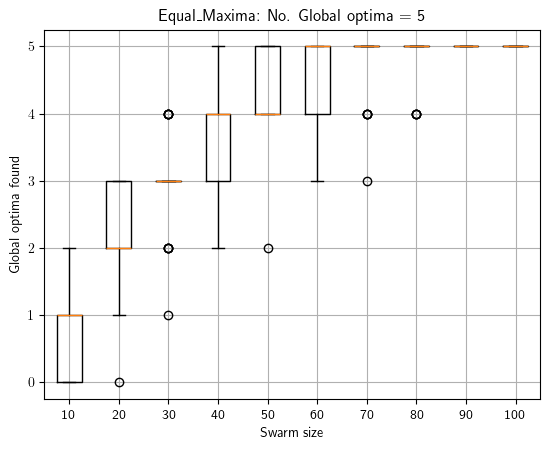

In [25]:
# Get the data (counts).
labels, data = stats_per_run.keys(), stats_per_run.values()

plt.boxplot(data)
plt.xticks(range(1, len(labels) + 1), labels)

plt.title(f"{benchmark.name}: No. Global optima = {gopt_total}")
plt.xlabel("Swarm size")
plt.ylabel("Global optima found")
plt.grid()

# Save to file.
plt.savefig(f"{benchmark.name}.pdf", format="pdf", dpi=300)

### End of file